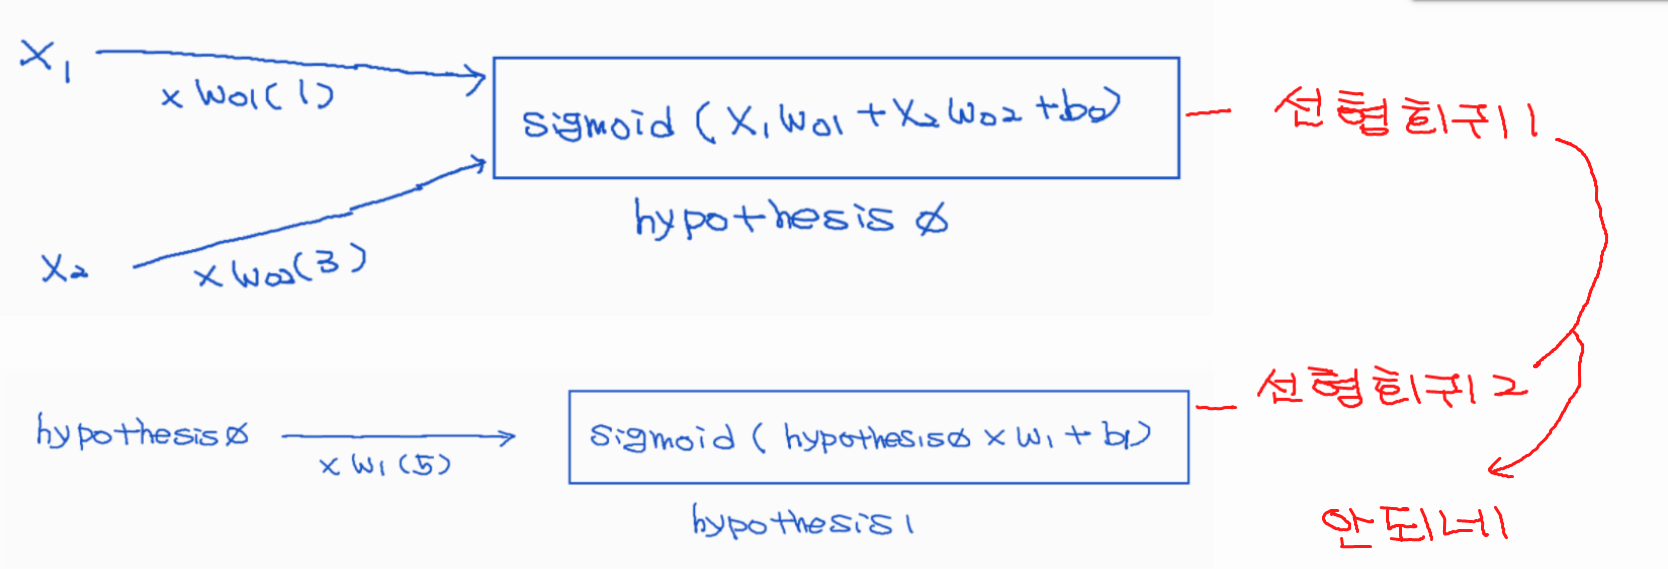

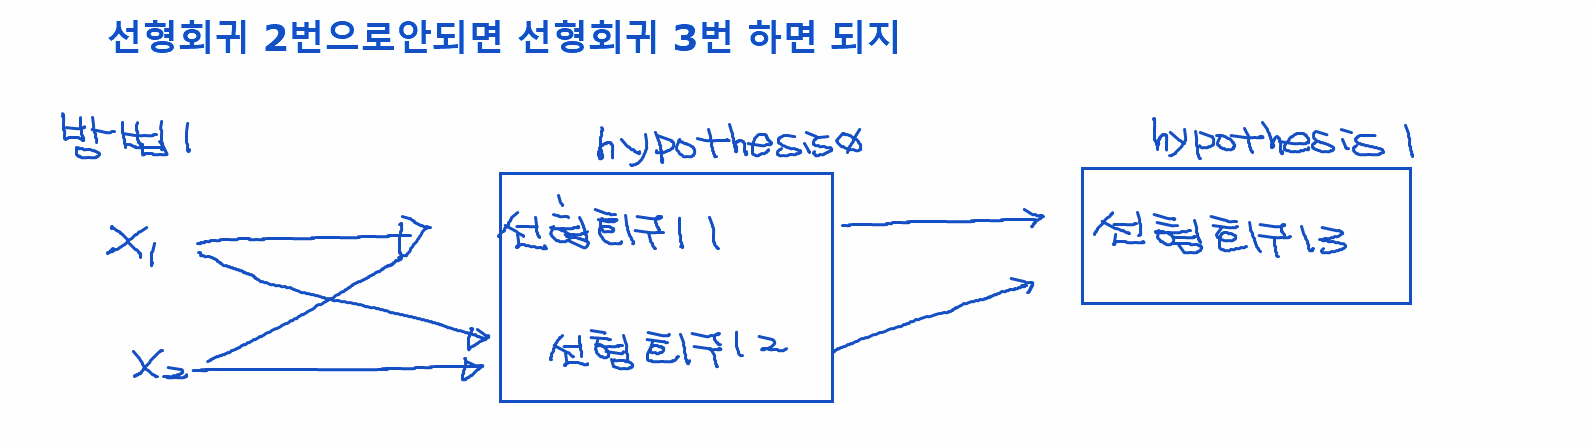

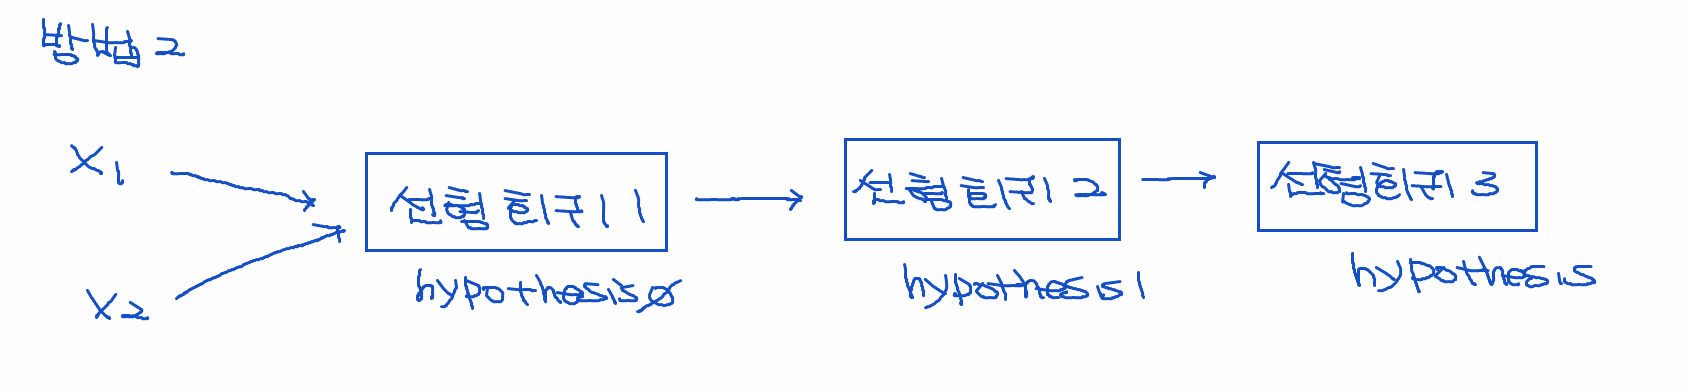

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
tf.enable_eager_execution()

In [5]:
X = np.array([
              [0,0],
              [0,1],
              [1,0],
              [1,1]
            ], dtype="float32")

In [6]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [7]:
y = np.array([
              [0],
              [1],
              [1],
              [0]
            ], dtype="float32")

In [8]:
y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [9]:
w0 = tf.Variable([
                  [1,2],
                  [3,4]
                ], dtype="float32")

In [10]:
w0

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [11]:
b0 = tf.Variable([
                  [0,0]
                ], dtype="float32")

In [12]:
b0

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[0., 0.]], dtype=float32)>

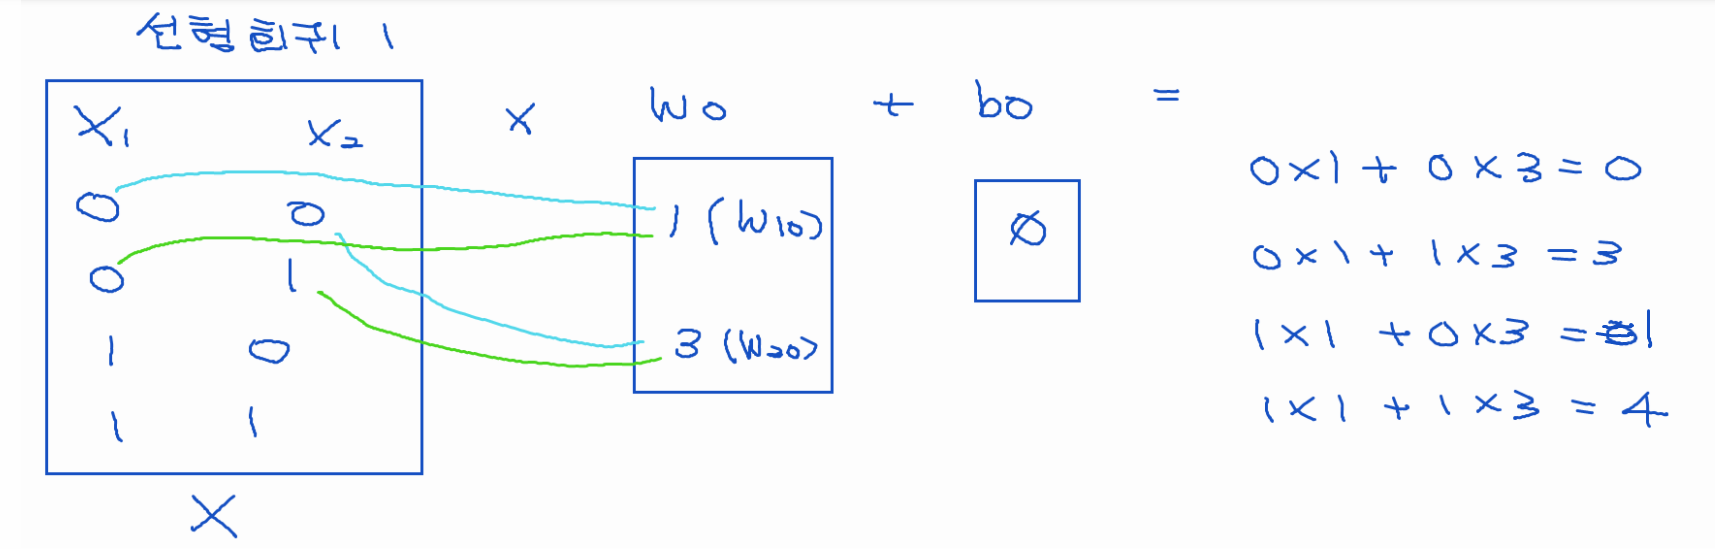

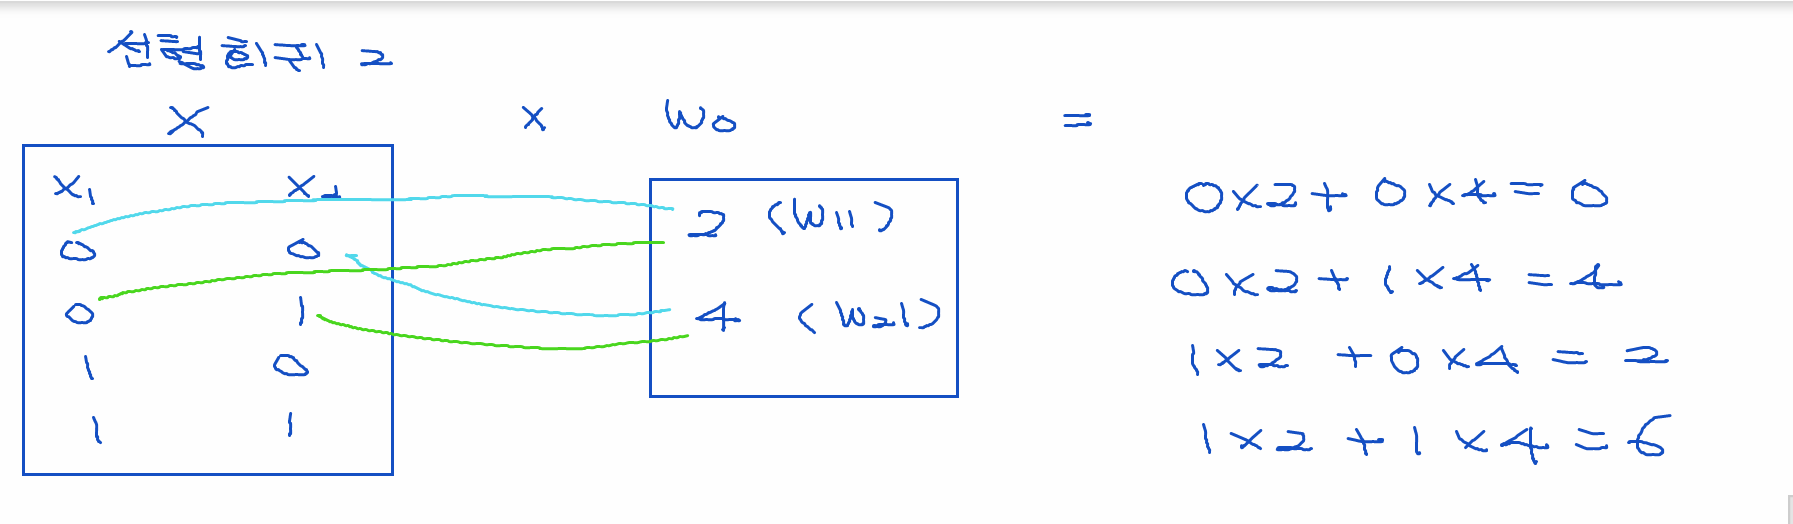

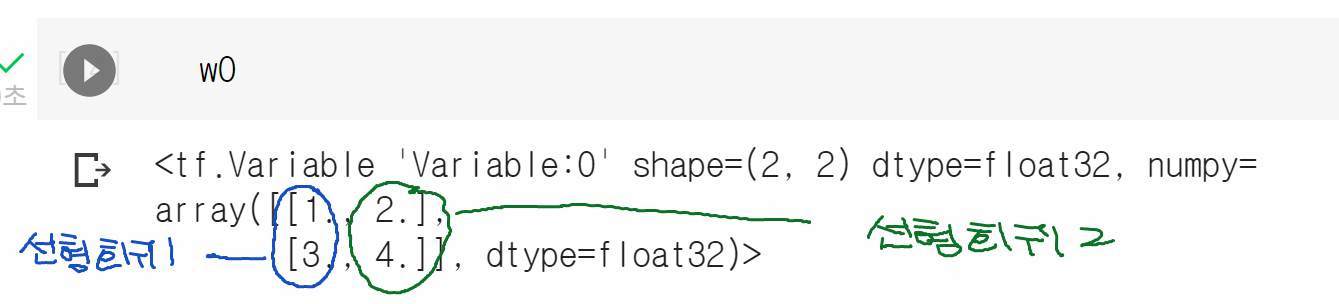

In [14]:
w0

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

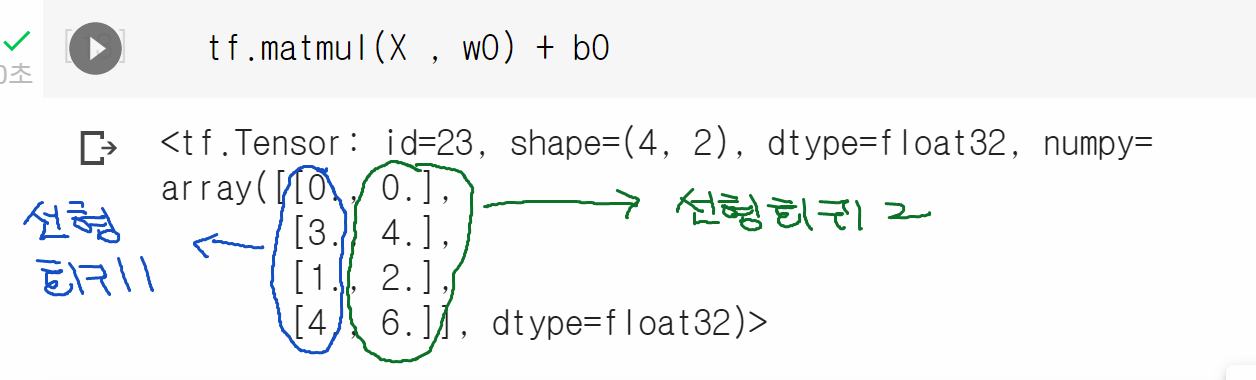

In [13]:
tf.matmul(X , w0) + b0

<tf.Tensor: id=23, shape=(4, 2), dtype=float32, numpy=
array([[0., 0.],
       [3., 4.],
       [1., 2.],
       [4., 6.]], dtype=float32)>

In [15]:
tf.sigmoid(  tf.matmul(X , w0) + b0 )

<tf.Tensor: id=31, shape=(4, 2), dtype=float32, numpy=
array([[0.5       , 0.5       ],
       [0.95257413, 0.98201376],
       [0.7310586 , 0.8807971 ],
       [0.98201376, 0.99752736]], dtype=float32)>

In [16]:
hypothesis0 = tf.sigmoid(  tf.matmul(X , w0) + b0 )

In [17]:
hypothesis0

<tf.Tensor: id=37, shape=(4, 2), dtype=float32, numpy=
array([[0.5       , 0.5       ],
       [0.95257413, 0.98201376],
       [0.7310586 , 0.8807971 ],
       [0.98201376, 0.99752736]], dtype=float32)>

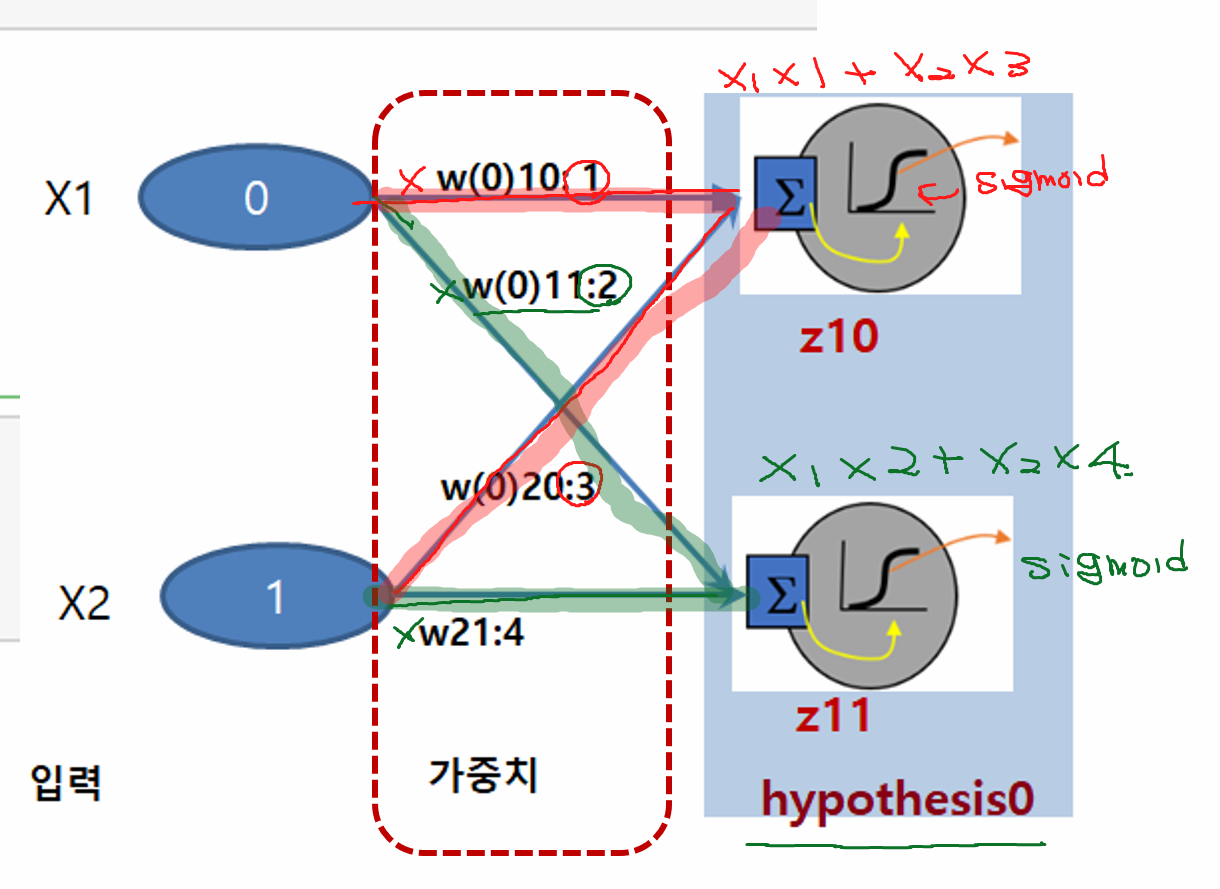

In [18]:
w1 = tf.Variable([
                  [5],
                  [6]
                 ],
                 dtype="float32")

In [19]:
w1

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[5.],
       [6.]], dtype=float32)>

In [20]:
b1 = tf.Variable([[0]], dtype="float32")

In [21]:
b1

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>

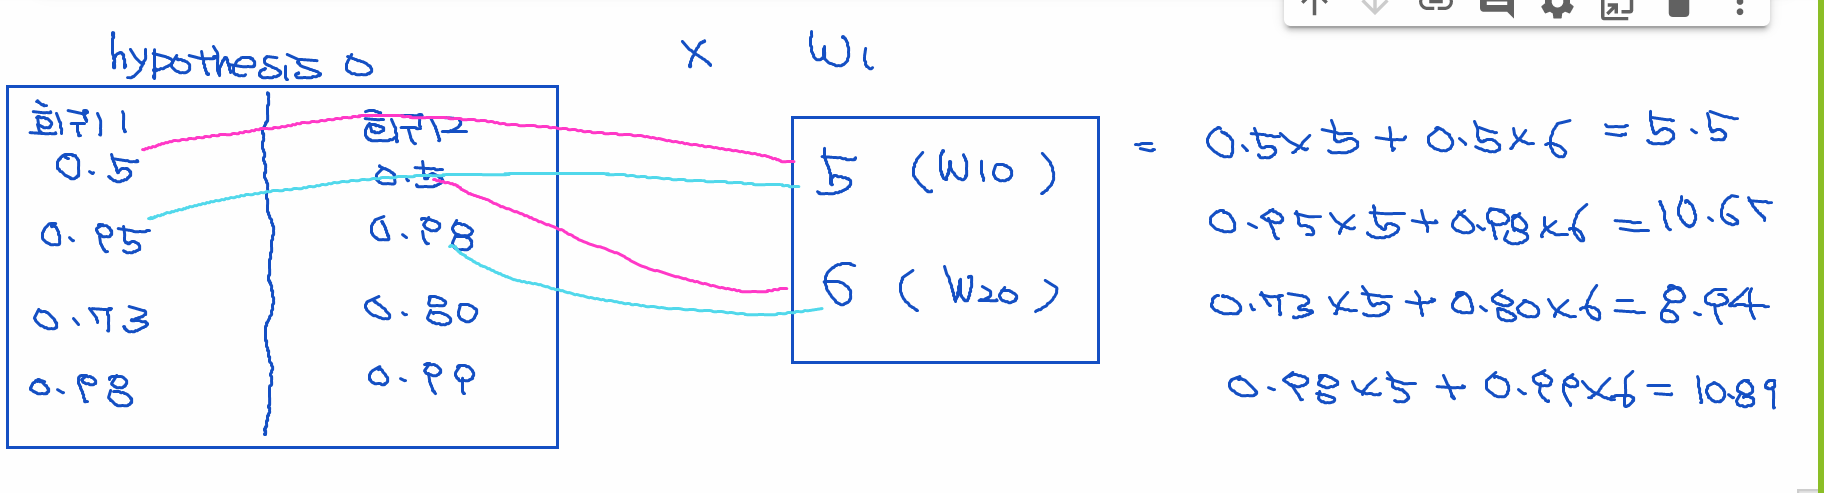

In [22]:
tf.matmul(hypothesis0, w1)+b1

<tf.Tensor: id=59, shape=(4, 1), dtype=float32, numpy=
array([[ 5.5     ],
       [10.654953],
       [ 8.940076],
       [10.895233]], dtype=float32)>

In [23]:
tf.sigmoid( tf.matmul(hypothesis0, w1)+b1 )

<tf.Tensor: id=64, shape=(4, 1), dtype=float32, numpy=
array([[0.9959299],
       [0.9999764],
       [0.999869 ],
       [0.9999814]], dtype=float32)>

In [24]:
hypothesis1 = tf.sigmoid( tf.matmul(hypothesis0, w1)+b1 )

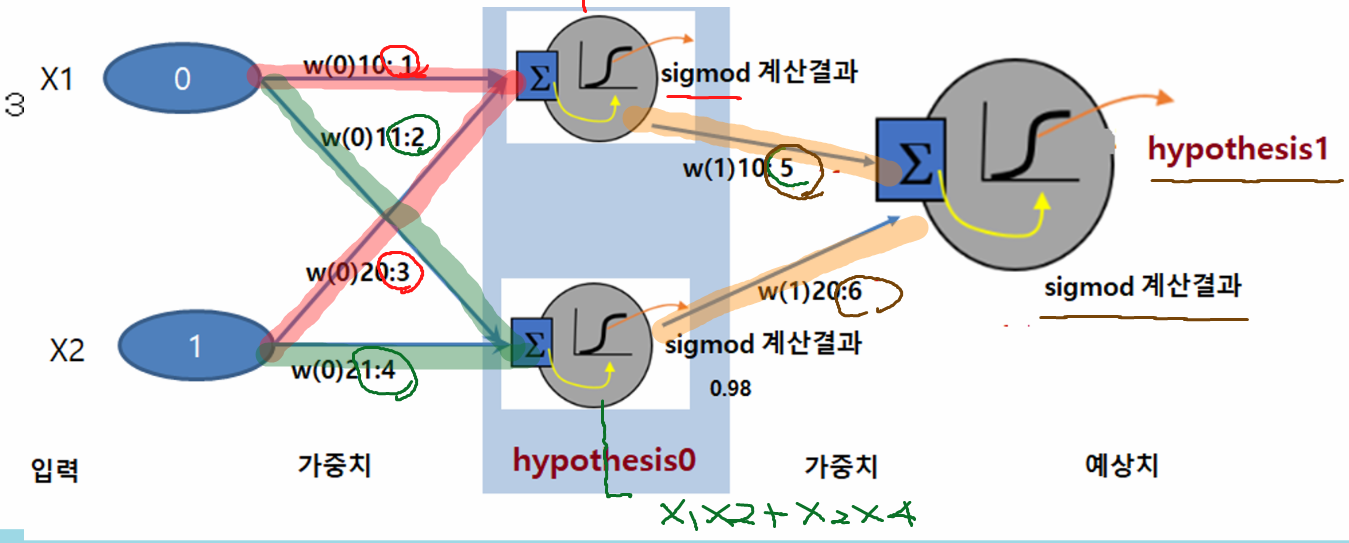

In [25]:
hypothesis1

<tf.Tensor: id=69, shape=(4, 1), dtype=float32, numpy=
array([[0.9959299],
       [0.9999764],
       [0.999869 ],
       [0.9999814]], dtype=float32)>

In [26]:
optimizer = tf.train.AdamOptimizer(0.1)

In [31]:
for step in range(5000):
    print("step = ", step)
    print("="*100)
    with tf.GradientTape() as tape:
        print("w0 = ", w0)
        print("b0 = ", b0)
        hypothesis0 = tf.sigmoid(tf.matmul(X, w0)+b0)
        print("hypothesis0 =", hypothesis0)
        print("="*100)
        print("w1 = ", w1)
        print("b1 = ",b1)
        hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1)+b1)
        print("hypothesis1 = ", hypothesis1)
        print("="*100)
        cost = -tf.reduce_mean( y * tf.log(hypothesis1)+ (1-y)*tf.log(1-hypothesis1))
        print("cost = ", cost)
        grads = tape.gradient(cost, [w0,w1,b0,b1])
        print("grads = ", grads)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[w0,w1,b0,b1]))
        print("="*100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[[2.0429409e-04]
 [9.9980003e-01]
 [9.9963939e-01]
 [1.8571968e-04]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(0.00023767451, shape=(), dtype=float32)
grads =  [<tf.Tensor: id=440213, shape=(2, 2), dtype=float32, numpy=
array([[ 5.9075733e-06,  7.9651505e-07],
       [-6.1812575e-06, -2.0290329e-06]], dtype=float32)>, <tf.Tensor: id=440203, shape=(2, 1), dtype=float32, numpy=
array([[ 4.5703171e-05],
       [-4.9745762e-05]], dtype=float32)>, <tf.Tensor: id=440212, shape=(1, 2), dtype=float32, numpy=array([[-5.871026e-06, -1.373658e-06]], dtype=float32)>, <tf.Tensor: id=440201, shape=(1, 1), dtype=float32, numpy=array([[-4.264198e-05]], dtype=float32)>]
step =  4828
w0 =  <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -9.075509, -12.633442],
       [  9.636897,  12.924306]], dtype=float32)>
b0 =  <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 4.260698 , -7.2059054]], dtype=float32)>
hypothesis0 = tf.

In [32]:
w0

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -9.12464 , -12.648861],
       [  9.688222,  12.943744]], dtype=float32)>

In [33]:
b0

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 4.284906 , -7.1995845]], dtype=float32)>

In [34]:
w1

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-17.039652],
       [ 17.550508]], dtype=float32)>

In [35]:
b1

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[8.180049]], dtype=float32)>